In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ising1d import (compute_energy1d, run_ising1d, compute_magnetisation1d,run_iteration1d)

def plot_state(state):
    state_for_plotting = np.tile((state + 1) / 2, (10,1))
    plt.figure()
    plt.imshow(state_for_plotting, cmap='gray')

In [2]:
def plot_state(state):
    state_for_plotting = np.tile((state + 1) / 2, (10,1))
    plt.imshow(state_for_plotting, cmap='gray')

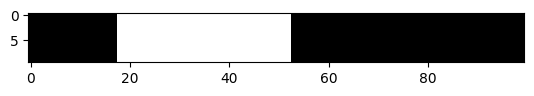

In [14]:
final_stateT05 = run_ising1d_faster(N=100, T=0.5, niters=100000)[0]
plot_state(final_stateT05)

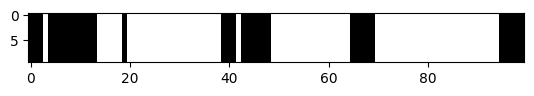

In [16]:

final_stateT1 = run_ising1d_faster(N=100, T=1, niters=100000)[0]
plot_state(final_stateT1)

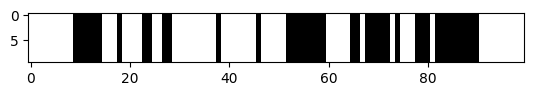

In [19]:
final_stateT2 = run_ising1d_faster(N=100, T=2, niters=100000)[0]
plot_state(final_stateT2)

In [16]:
# temperatures = np.logspace(-1, 1.5, 20)
# energies_T = []
# delta_energies_T = []
# for t in temperatures:
#     energies = []
#     for i in range(5):
#         (states, magnetisation, energy) = run_ising1d(T=t, N=100, niters = 200000, nsamples=10000, evaluate_functions=[sum, compute_energy1d])
#         energies.append(np.mean(energy))
#     energies_T.append(np.mean(energies))
#     delta_energies_T.append(np.std(energies) / len(energies))
N=100
niters = 200000
nsamples = 10000
npoints = 10
navg = 10


temperatures = np.logspace(-1, 1.5, npoints)
magnetisations = []
energies = []
energy_squareds = []
delta_magnetisations = []
delta_energies = []
delta_energy_squareds = []

ms = []
es = []

for t in temperatures:
    m = []
    e = []
    for i in range(navg):
        (state, magnetisation, energy) = run_ising1d(T=t, N=N, niters = niters, nsamples=nsamples, evaluate_functions=[compute_magnetisation1d, compute_energy1d])
        m.append(np.mean(magnetisation))
        e.append(np.mean(energy))
    ms.append(m)
    es.append(e)
    magnetisations.append(np.mean(m))
    energies.append(np.mean(e))
    
    delta_magnetisations.append(np.std(m) / np.sqrt(len(m)))
    delta_energies.append(np.std(e) / np.sqrt(len(e)))

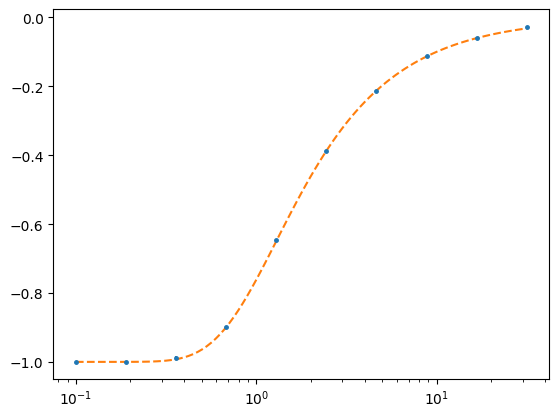

In [23]:

energy_Ns = np.array(energies)/N
delta_energy_Ns = np.array(delta_energies) / N

plt.figure()

x_exact = np.logspace(-1,1.5, 101)
y_exact = -np.tanh(1/x_exact)
plt.plot(x_exact, y_exact, linestyle='--', color='C1')

plt.errorbar(temperatures, energy_Ns, yerr=delta_energy_Ns, fmt='.',markersize=5, color='C0')
plt.xscale('log')




In [49]:
entropies = np.zeros(len(energies))

entropies[0] = np.log(2)
for i in range(1,npoints):
    entropies[i] = entropies[i-1] + (energies[i] - energies[i-1]) * (temperatures[i] + temperatures[i-1]) / (2*temperatures[i]*temperatures[i-1])

    

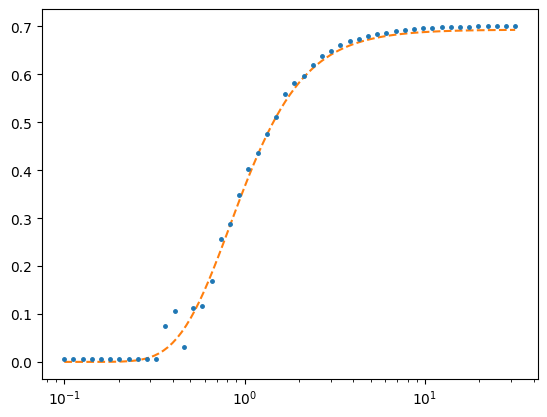

In [50]:
def s_exact(T, epsilon=1, k=1):
    beta = 1/(k*T)
    return (epsilon / T * (1 - np.tanh(beta*epsilon)) + k * np.log(1+np.exp(-2*beta*epsilon)))


plt.figure()

x_exact = np.logspace(-1,1.5, 101)
y_exact = s_exact(x_exact)
plt.plot(x_exact, y_exact, linestyle='--', color='C1')

plt.errorbar(temperatures, entropies/N, fmt='.',markersize=5, color='C0')
plt.xscale('log')


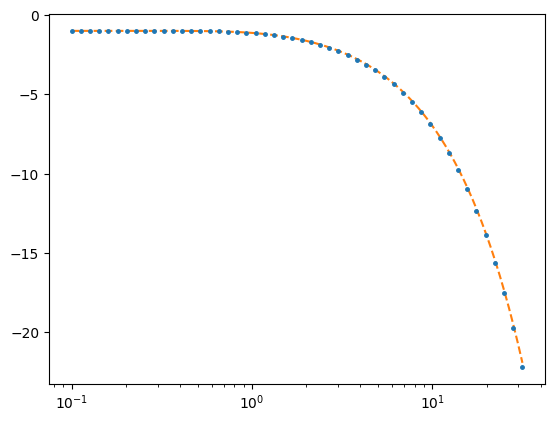

In [51]:
fs = energies - temperatures * entropies

def f_exact(T, epsilon=1, k=1):
    beta = 1/(k*T)
    return -epsilon - k * T * np.log(1+np.exp(-2*epsilon*beta))



plt.figure()

x_exact = np.logspace(-1,1.5, 101)
y_exact = f_exact(x_exact)
plt.plot(x_exact, y_exact, linestyle='--', color='C1')

plt.errorbar(temperatures, fs/N, fmt='.',markersize=5, color='C0')
plt.xscale('log')

In [ ]:

# Heat Capacity
N=100
niters = 200000
nsamples = 50000
npoints = 10
navg = 10


Cs = []
Delta_Cs = []
dt = 0.05

Cs3 = []
Delta_Cs3 = []

E1s = []
E2s = []
Delta_E1s = []
Delta_E2s = []
for t in temperatures:
    e1s = []
    e2s = []
    cs = []
    cs3 = []
    for i in range(navg):
        (state, e1) = run_ising1d(T=t-dt, N=N, niters = niters, nsamples=nsamples, evaluate_functions=[compute_energy1d])
        (state, e2) = run_ising1d(T=t+dt, N=N, niters = niters, nsamples=nsamples, evaluate_functions=[compute_energy1d])
        e1s.append(np.mean(e1))
        e2s.append(np.mean(e2))
        cs.append((np.mean(e2) - np.mean(e1))/(2*dt))
        cs3.append((np.mean(np.array(e1)**2) - np.mean(e1)**2)/(t**2))
    E1s.append(np.mean(e1s))
    E2s.append(np.mean(e2s))

    Delta_E1s.append(np.std(e1s) / np.sqrt(len(e1s)))
    Delta_E2s.append(np.std(e2s) / np.sqrt(len(e2s)))

    Cs.append(np.mean(cs))
    Delta_Cs.append(np.std(cs)/np.sqrt(len(cs)))

    Cs3.append(np.mean(cs3))
    Delta_Cs3.append(np.std(cs3)/np.sqrt(len(cs3)))

    
Cs2 = (np.array(E2s) - np.array(E1s)) / (2*dt)
Delta_Cs2 = np.sqrt(np.array(Delta_E1s)**2 + np.array(Delta_E2s)**2) / (2*dt)



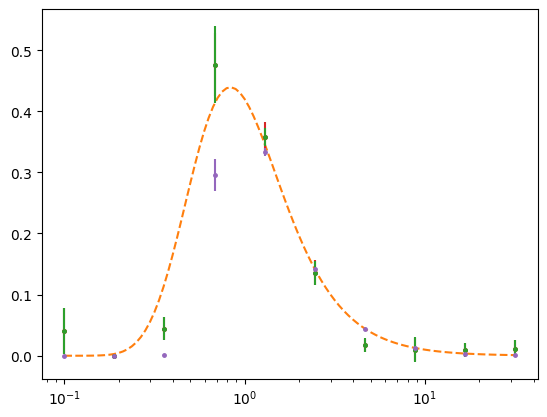

In [56]:
# print(type(energies))
# print(type(energy_squareds))
# print(type(temperatures))

# Cs = (np.array(energy_squareds) - np.array(energies)**2) / (temperatures**2)
DeltaCs = np.sqrt(np.array(Delta_E1s)**2 + np.array(Delta_E2s)**2) / (2*dt)

def c_exact(T, epsilon=1, k=1):
    beta = 1/(k*T)
    return epsilon**2 * beta / (T * np.cosh(beta * epsilon)**2)

# Cs2 = np.zeros(len(temperatures))
# Cs2[0] = (energies[1] - energies[0]) / (temperatures[1]-temperatures[0])
# for i in range(1,len(Cs2)-1):
#     Cs2[i] = (energies[i+1] - energies[i]) / (temperatures[i+1]-temperatures[i])
# Cs2[-1] = (energies[-1] - energies[-2]) / (temperatures[-1] - temperatures[-2])


plt.figure()

x_exact = np.logspace(-1,1.5, 101)
y_exact = c_exact(x_exact)
plt.plot(x_exact, y_exact, linestyle='--', color='C1')

# plt.plot(temperatures, np.array(Cs)/N, '.',markersize=5, color='C0')
plt.errorbar(temperatures, np.array(Cs2)/N, np.array(Delta_Cs2)/N, fmt='.',markersize=5, color='C3')
plt.errorbar(temperatures, np.array(Cs)/N, np.array(Delta_Cs)/N, fmt='.',markersize=5, color='C2')
plt.errorbar(temperatures, np.array(Cs3)/N, np.array(Delta_Cs3)/N, fmt='.',markersize=5, color='C4')
plt.xscale('log')